# About the project

In this project, we will focus on explanatory data visualization to make efficient graphps, combining all the following: 

> - How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
> - About the elements of a story and how to create storytelling data visualizations using Matplotlib.
> - How to create visual patterns using Gestalt principles.
> - How to guide the audience's attention with pre-attentive attributes.
> - How to use Matplotlib built-in styles - with a case study on the FiveThirtyEight style.

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro is the official currency. **Daria Chemkaeva** put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) - the data source is the **European Central Bank**. The dataset gets regular updates - this one was downloaded on January 2021. 

## Import libraries and open files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [2]:
exchange_rate = pd.read_csv(r"Desktop\New folder\project6\euro-daily-hist_1999_2020.csv")
print(exchange_rate.head())
print(exchange_rate.tail())
print(exchange_rate.info())


  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

The dataset consists of 5,699 entries and 41 columns. The Period\Unit column was the recorded time, and defined as object, which should be datetime type. These others columns are exchange rate in different currencies and there are several columns with null value, especially Greek drachma with null values accounted for 91%.

Our analysis focuses only on exchange rate between Euro and US dollar without null values. So it's fine for our work. However, if you want to expand your analysis to other currencies, you need to figure out an efficient way to deal with null values.

## Cleaning the dataset

In [3]:
# Rename [US dollar] and Period\Unit to US_dollar and Time
# Change time column to a datetime data type
# Sort the values by Time in ascending order
# Reset the index (and drop the initial index)
exchange_rate.rename({'Period\\Unit:': "Time", '[US dollar ]': "US_dollar"}, axis = 1, inplace = True)
exchange_rate['Time'] = pd.to_datetime(exchange_rate['Time'])
exchange_rate.sort_values('Time', inplace = True)
exchange_rate.reset_index(drop = True, inplace = True)


In [4]:
euro_to_dollar = exchange_rate[['Time', 'US_dollar']]
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [5]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.2745     1
1.0057     1
1.0022     1
1.0639     1
1.3959     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
# there are 62 entries of - , filter them out to have clean data
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != "-"]
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

## Visualize the data

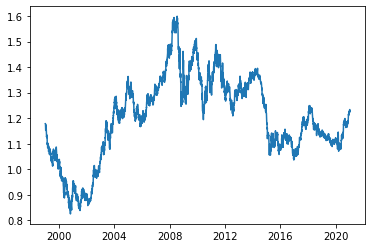

In [7]:
x_axis = euro_to_dollar['Time']
y_axis = euro_to_dollar['US_dollar']
plt.plot(x_axis, y_axis)

We see many small wiggles in the line shape, because it represents daily variation in the exchange rate. The rate goes up and down regularly day to day. To demonstrate the long-term trends, we apply the rolling mean, or moving average. Let's check several moving averages to choose the most suitable one.

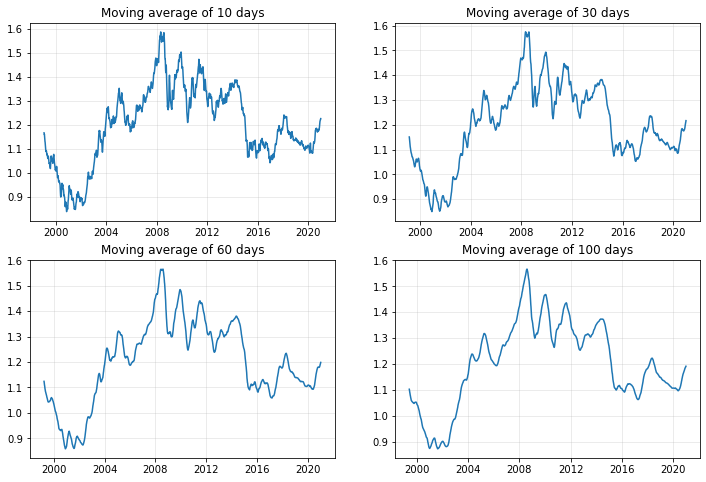

In [8]:
# Create graphs of moving average 10 days, 30 days, 60 days and 100 days.
days = [10, 30, 60, 100]
plt.figure(figsize= (12, 8))
for i, day in zip(range(4),days):
    ax= plt.subplot(2,2,i+1)
    ax.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(day).mean())
    label = "Moving average of {} days".format(day)
    ax.set_title(label, size = 12)
    ax.grid(alpha = 0.3)


In [9]:
# Let's choose moving average of 30 days
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar['rolling_mean'].tail()

5694    1.211170
5695    1.212530
5696    1.213987
5697    1.215357
5698    1.216557
Name: rolling_mean, dtype: float64

To create a story, we need to arrange our data into a Series of events that show change. Some examples of story: 
> - We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

> - We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.

> - We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

In this analysis, we will go through main events leading to fluctuation in Euro-USD exchange rate. Those main events happened in: 
> - 2000 - 2008: The euro traded within a narrow range until officially launched as a currency. Until 2002, it was used only for electronic transactions. During 2002 - 2008, the euro rose by 63%, and reached peak in 2008 during the [subprime mortage crisis](https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745).

> - 2009 - 2014: The exchange rate flutuated due to: the increase of European Central Bank benchmark interest rate (2009); [U.S. debt default crisis](https://www.thebalance.com/u-s-debt-default-3306295) in 2011; the worsening eurozone crisis pummeled the euro in 2012.

> - 2014 - now: Crisis in Ukraine (2014) made the euro fell again, then fell to 1.12 when the announcement of ECB about purchasing 60 million in euro-denominated bonds each month and further to 1.06 when the terrorists attacked Paris in 2017. From 2020 - now, the impact of Coronavirus on exchange rate

In [10]:
df = euro_to_dollar.copy()[(x_axis.dt.year >=2000)
                                    & (x_axis.dt.year <=2021)]
first_period = df.copy()[(df['Time'].dt.year >= 2000) & (df['Time'].dt.year <=2008)]
second_period = df.copy()[(df['Time'].dt.year > 2008) & (df['Time'].dt.year <=2013)]
third_period = df.copy()[(df['Time'].dt.year > 2013) & (df['Time'].dt.year <=2021)]
color1 = '#BF5FFF'
color2 = '#ffa500'
color3 = '#00B2EE'


<ipython-input-11-02398cbdeb3c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2000', '', '2002', '', '2004','','2006','','2008'])
<ipython-input-11-02398cbdeb3c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013'])
<ipython-input-11-02398cbdeb3c>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['','2014','', '2016', '', '2018', '', '2020',''])


Text(10700, 0.65, '©DATAQUEST                                                                                                       Source: European Central Bank')

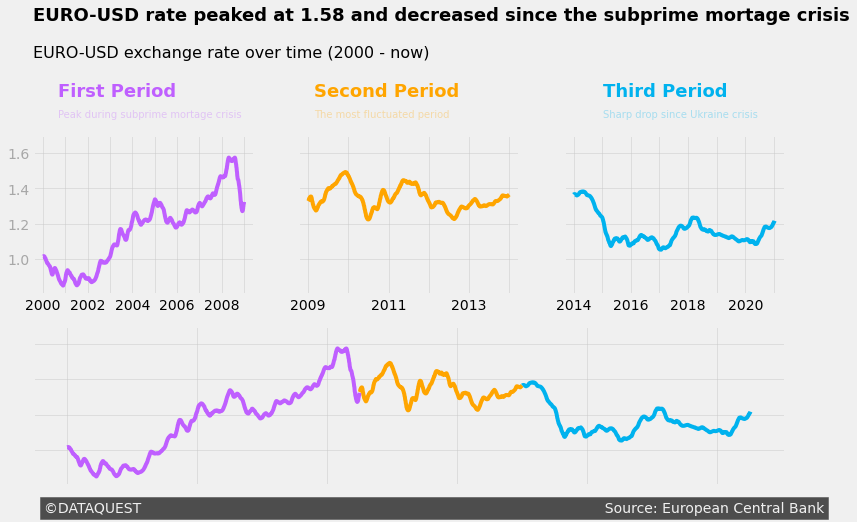

In [11]:
style.use("fivethirtyeight")
plt.figure(figsize = (12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]
# for all axes
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.grid(alpha = 0.5)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels([])
    
# First period from 2000 to 2008
ax1.plot(first_period['Time'], first_period['rolling_mean'], color = color1)
ax1.set_xticklabels(['', '2000', '', '2002', '', '2004','','2006','','2008'])
ax1.set_yticklabels(['1.0', '1.2','1.4', '1.6'],alpha=0.3)
ax1.text(11200, 1.92, "First Period", size = 18, weight ='bold', color = color1)
ax1.text(11200, 1.8, "Peak during subprime mortage crisis", size = 10, color = color1, alpha = 0.3)

# Second period from 2009 - 2014

ax2.plot(second_period['Time'], second_period['rolling_mean'], color = color2)
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013'])
ax2.text(14300, 1.92, "Second Period", size = 18, weight ='bold', color = color2)
ax2.text(14300, 1.8, "The most fluctuated period", size = 10, color = color2, alpha= 0.3)

# Third period from 2014 - now

ax3.plot(third_period['Time'], third_period['rolling_mean'], color = color3)
ax3.set_xticklabels(['','2014','', '2016', '', '2018', '', '2020',''])
ax3.text(16450, 1.92, "Third Period", size = 18, weight ='bold', color = color3)
ax3.text(16450, 1.8, "Sharp drop since Ukraine crisis", size = 10, color = color3, alpha= 0.3)

# The whole period
ax4.plot(first_period['Time'], first_period['rolling_mean'], color = color1)
ax4.plot(second_period['Time'], second_period['rolling_mean'], color = color2)
ax4.plot(third_period['Time'], third_period['rolling_mean'], color = color3)
ax4.set_xticklabels([])

# Add title and subtile
ax1.text(10800, 2.35, "EURO-USD rate peaked at 1.58 and decreased since the subprime mortage crisis",
        size = 18, weight = 'bold')
ax1.text(10800, 2.14, "EURO-USD exchange rate over time (2000 - now)", size = 16)

# Add signature bar
ax4.text(10700, 0.65,'©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)


# Conclusion

We have applied visualization principles to draw a line graph of time series data. What should be taken into consideration include: 
1) The story we want to communicate through our data, 

2) Choosing appropriate visualizations for the story

3) Applying principles of visualization: familiarity, maximizing data elements, increase data-ink ratio, and Gestalt principles to create the most efficients graphs. 